In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3527,spam,You are a å£1000 winner or Guaranteed Caller P...,NaN,NaN,NaN
2360,ham,Had the money issue weigh me down but thanks t...,NaN,NaN,NaN
5160,ham,Ok... Then r we meeting later?,NaN,NaN,NaN
4076,ham,Hey sathya till now we dint meet not even a si...,NaN,NaN,NaN
2500,ham,Remember to ask alex about his pizza,NaN,NaN,NaN


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
4420,ham,Still at west coast... Haiz... ÌÏ'll take fore...
3001,ham,"Excellent, I'll see what riley's plans are"
3875,ham,did u get that message
4669,ham,"I didnt get ur full msg..sometext is missing, ..."
1046,ham,Do 1 thing! Change that sentence into: \Becaus...


In [8]:
#renaming the column name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
2083,ham,"you are sweet as well, princess. Please tell m..."
2010,ham,Dunno lei... I thk mum lazy to go out... I nev...
2735,ham,I meant middle left or right?
3864,ham,"THATåÕS ALRITE GIRL, U KNOW GAIL IS NEVA WRONG..."
4131,ham,Hi baby ive just got back from work and i was ...


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [14]:
#checking missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#checking duplicate value
df.duplicated().sum()

403

In [16]:
#removing duplicate
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# EDA

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

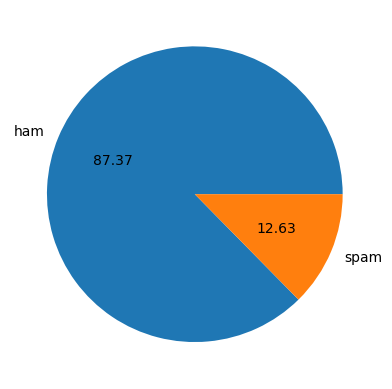

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [21]:
#We require nltk (Natural Language Tool Kit) package to find number of char, words and sentences 
import nltk

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amrap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#num of char

df['num_characters']=df['text'].apply(lambda x:len(x))

In [25]:
#num of words

df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
cols_required=df.columns.difference(['target','text']).tolist()

In [30]:
#for ham

df[df['target'] == 0][cols_required].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [31]:
# for spam

df[df['target']==1][cols_required].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


We can see that on avg num of characters, words and sentences are more for spam messages

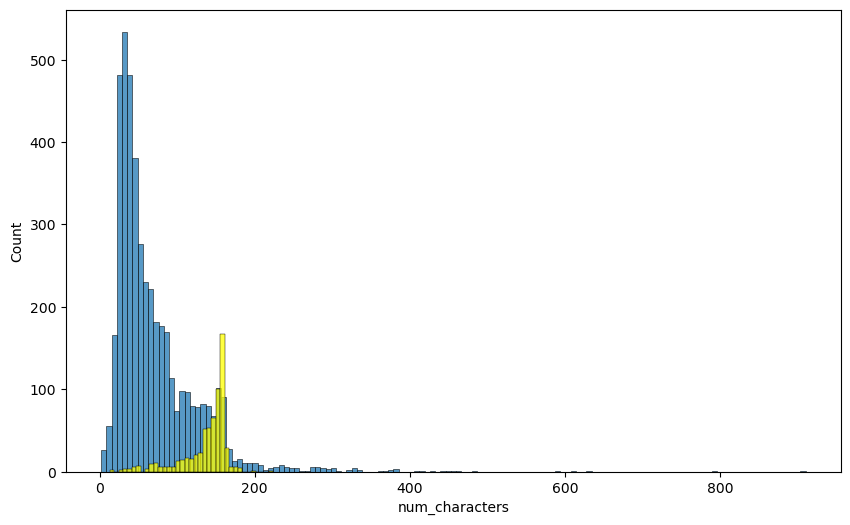

In [32]:
#visualisation for number of characters
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')
plt.show()

from graph we can see that avg num of characters for spam is more 
as for spam graph is left skew the mean is somewhere around suppose 140 so for 140 num_chars we have some about 80 such msg 
and for ham the graph is right skew so mean is somewhere around 80 so for 80 num_chars we have somewhere around 400 to 500 such msgs

Note-we are not checking num of msgs here what imp is that the avg num of characters for ham and spam and via graph its evident that avg number of characters for spam is more 

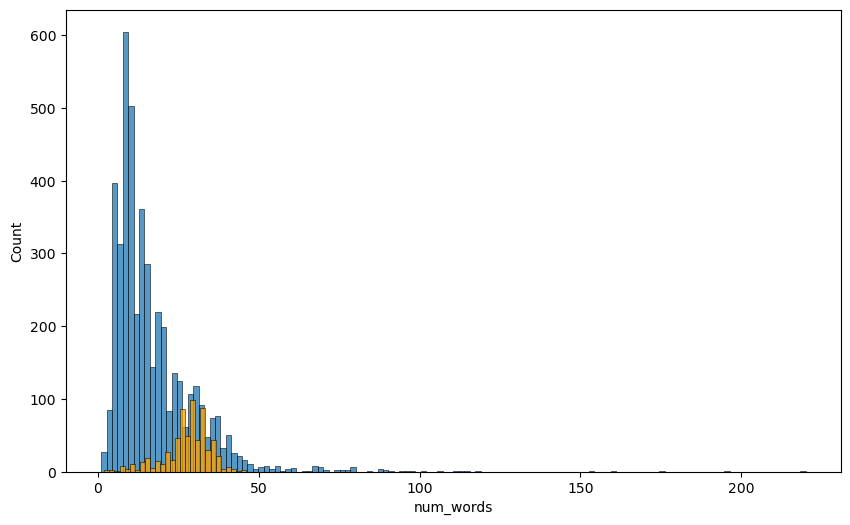

In [33]:
#visualization for number of word
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='orange')
plt.show()

via graph its evident that avg number of words for spam is more

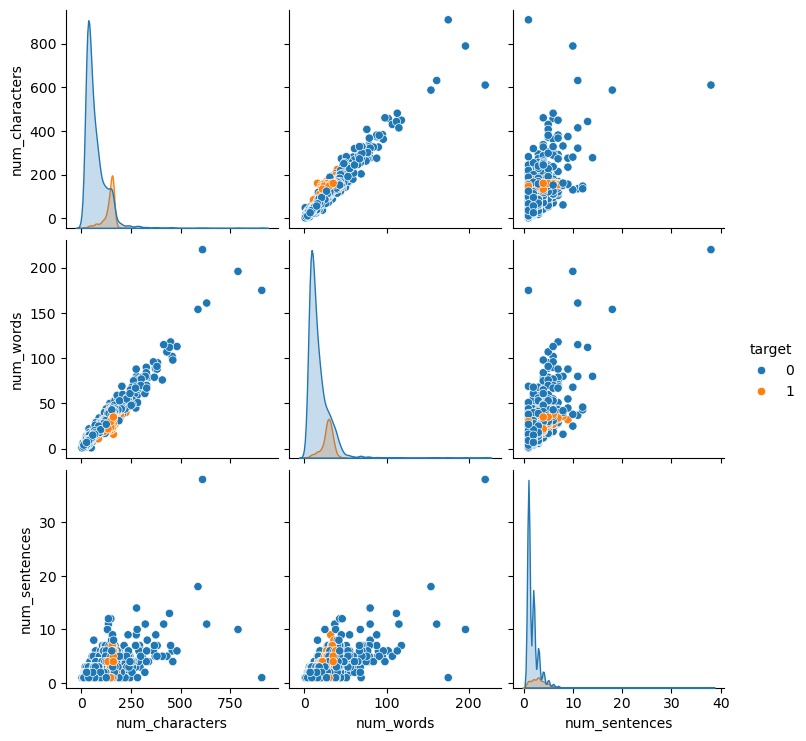

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

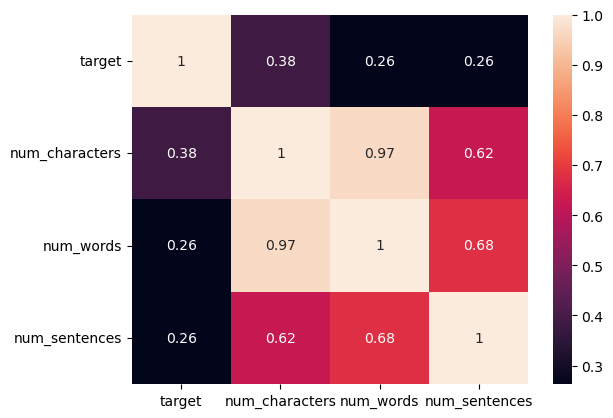

In [35]:


sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

There is multicollinearity in data (we have to be careful as these may effect our analysis so while making model we will take only one column out of num_char, num_word and num_sent basically num_char as its collinearity is 0.38 with target) 

# Data Preprocessing

Preprocessing on textual data are usually : </br>
*Lowercase</br>
*Tokenization</br>
*Removing special characters</br>
*Removing stop words and punctuations</br>
*Stemming

In [36]:
#lets us know stop words and punctutaions
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# these are the stopwords which dont hold meaning in sentences and are just used for sentence formation
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
#punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#stemming converts the word to its basic form like loving to love careing to care dancing to danc it has that forms

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Loveing")


'love'

In [40]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]# this will make cloneing and if we dont do this when we do y.clear than text will also get clear as it points to y
    y.clear()
   
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [41]:
#eg checking if function working properly
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [42]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [43]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [44]:
df['transformed_text']=df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though




**********Now lets use wordcloud which will give us which are those mostly important or can be seen words in ham or spam lets to 1st for spam

In [46]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

wc.generate requires a string we got the series converted to string using str.cat(sep= " ")

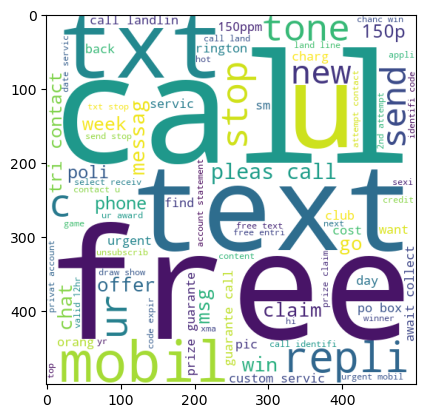

In [48]:
plt.imshow(spam_wc)

In [49]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

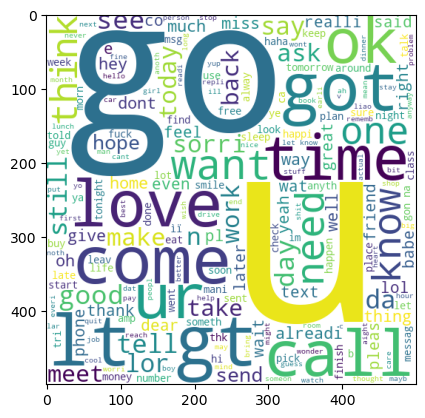

In [50]:
plt.imshow(ham_wc)

                               Now lets see which are the top 30 words of ham and spam using custom code

In [51]:
#for spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [52]:
len(spam_corpus)

9939

In [53]:
from collections import Counter
spam_corpus_counter=Counter(spam_corpus).most_common(30)

In [54]:
most_common_word_df=pd.DataFrame(spam_corpus_counter,columns=['Spam Word','Frequency'])

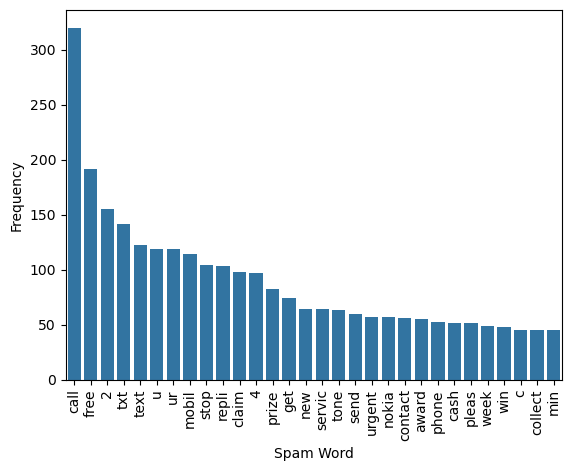

In [55]:
# Create a bar plot
sns.barplot(x='Spam Word', y='Frequency', data=most_common_word_df)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
#for ham

ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
ham_corpus_counter=Counter(ham_corpus).most_common(30)


In [58]:
most_common_word_df=pd.DataFrame(ham_corpus_counter,columns=['Ham Word','Frequency'])

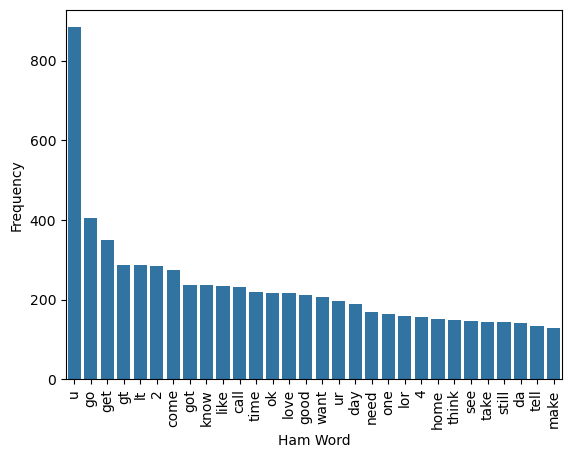

In [59]:
# Create a bar plot
sns.barplot(x='Ham Word', y='Frequency', data=most_common_word_df)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [62]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [63]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
X.shape

(5169, 6708)

In [65]:
y=df['target'].values

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [68]:
X=minmax.fit_transform(X)

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lrc=LogisticRegression(solver='liblinear')

In [72]:
lrc.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [73]:
y_pred_lrc=lrc.predict(X_test)

In [74]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_lrc))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_lrc))
print("Precision Score: ",precision_score(y_test,y_pred_lrc))

Accuracy Score:  0.9738878143133463
Confsion Matrix:  
 [[896   0]
 [ 27 111]]
Precision Score:  1.0


We actually wanted our model to have good precision score and we were able to accomplish it we can also try different models like SVM, Naive Bayes as Naive Bayes is most preferable for text related data, however will keep it for further steps for now will go with logistic regression

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_gnb))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score: ",precision_score(y_test,y_pred_gnb))

Accuracy Score:  0.8781431334622823
Confsion Matrix:  
 [[791 105]
 [ 21 117]]
Precision Score:  0.527027027027027


In [78]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_mnb))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score: ",precision_score(y_test,y_pred_mnb))

Accuracy Score:  0.9729206963249516
Confsion Matrix:  
 [[881  15]
 [ 13 125]]
Precision Score:  0.8928571428571429


In [79]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_bnb))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score: ",precision_score(y_test,y_pred_bnb))

Accuracy Score:  0.9700193423597679
Confsion Matrix:  
 [[893   3]
 [ 28 110]]
Precision Score:  0.9734513274336283


# Trying it with TfidfVectorizer

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [81]:
X_tfid = tfidf.fit_transform(df['transformed_text']).toarray()

In [82]:
X_tfid=minmax.fit_transform(X_tfid)

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_tfid,y,test_size=0.2,random_state=2)

In [84]:
lrc_tfid=LogisticRegression(solver='liblinear')

In [85]:
lrc_tfid.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [86]:
y_pred_tfid=lrc_tfid.predict(X_test)

In [87]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_tfid))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_tfid))
print("Precision Score: ",precision_score(y_test,y_pred_tfid))

Accuracy Score:  0.9748549323017408
Confsion Matrix:  
 [[894   2]
 [ 24 114]]
Precision Score:  0.9827586206896551


In [88]:
gnb_tfid=GaussianNB()
mnb_tfid=MultinomialNB()
bnb_tfid=BernoulliNB()

In [89]:
gnb_tfid.fit(X_train,y_train)
y_pred_gnb_tfid=gnb_tfid.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_gnb_tfid))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_gnb_tfid))
print("Precision Score: ",precision_score(y_test,y_pred_gnb_tfid))

Accuracy Score:  0.8723404255319149
Confsion Matrix:  
 [[782 114]
 [ 18 120]]
Precision Score:  0.5128205128205128


In [90]:
mnb_tfid.fit(X_train,y_train)
y_pred_mnb_tfid=mnb_tfid.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_mnb_tfid))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_mnb_tfid))
print("Precision Score: ",precision_score(y_test,y_pred_mnb_tfid))

Accuracy Score:  0.9787234042553191
Confsion Matrix:  
 [[889   7]
 [ 15 123]]
Precision Score:  0.9461538461538461


In [91]:
bnb_tfid.fit(X_train,y_train)
y_pred_bnb_tfid=bnb_tfid.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_bnb_tfid))
print("Confsion Matrix:  \n",confusion_matrix(y_test,y_pred_bnb_tfid))
print("Precision Score: ",precision_score(y_test,y_pred_bnb_tfid))

Accuracy Score:  0.9835589941972921
Confsion Matrix:  
 [[895   1]
 [ 16 122]]
Precision Score:  0.991869918699187


In [92]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(lrc,open('model.pkl','wb'))

In [93]:
import pickle

try:
    with open('vectorizer.pkl', 'rb') as file:
        vectorizer = pickle.load(file)
except Exception as e:
    print("Error loading pickle file:", e)


In [94]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(bnb_tfid,open('model1.pkl','wb'))